In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [17]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
import cv2
import imghdr

data_dir = 'data'
test_dir = 'test'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for category in os.listdir(data_dir):
    if category == '.DS_Store' : continue
    for image in os.listdir(os.path.join(data_dir, category)):
        image_path = os.path.join(data_dir, category, image)
        try:
            img = cv2.imread(image_path)
            if imghdr.what(image_path) not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print(e)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [19]:
# import shutil 

# for category in os.listdir(data_dir):
#     if category == '.DS_Store' : continue
#     os.mkdir(os.path.join(test_dir, category))
#     test_file_count = round(len(os.listdir(os.path.join(data_dir, category))) * .2)
#     for image in os.listdir(os.path.join(data_dir, category)):
#         shutil.move(os.path.abspath(os.path.join(data_dir, category, image)), os.path.abspath(os.path.join(test_dir, category, image)))
#         test_file_count -= 1
#         if test_file_count == 0: break

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(validation_split = 0.3, rescale=1/255)
train = image_data_generator.flow_from_directory(directory=data_dir, target_size=(256,256), batch_size = 32, class_mode='categorical', subset='training')
val = image_data_generator.flow_from_directory(directory=data_dir, target_size=(256,256), batch_size = 32, class_mode='categorical', subset='validation')
test = ImageDataGenerator(rescale=1/255).flow_from_directory(directory=test_dir, target_size=(256,256), batch_size = 32, class_mode='categorical')

Found 14663 images belonging to 10 classes.
Found 6279 images belonging to 10 classes.
Found 5236 images belonging to 10 classes.


In [37]:
np.max(train[0][0])

1.0

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

model = Sequential()

model.add(Conv2D(128, (3,3), 1, input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(len(train.class_indices), activation='softmax'))

model.compile('adam', loss=tf.keras.losses.categorical_crossentropy , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)       

In [40]:
logdir = 'logs'
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/20
459/459 [==============================] - 94s 202ms/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 6.1547 - val_accuracy: 0.5173
Epoch 2/20
459/459 [==============================] - 94s 205ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 6.1840 - val_accuracy: 0.5173
Epoch 3/20
459/459 [==============================] - 93s 202ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 5.5549 - val_accuracy: 0.5248
Epoch 4/20
459/459 [==============================] - 96s 208ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 5.9153 - val_accuracy: 0.5186
Epoch 5/20
459/459 [==============================] - 93s 202ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 5.9996 - val_accuracy: 0.5385
Epoch 6/20
459/459 [==============================] - 93s 202ms/step - loss: 0.0365 - accuracy: 0.9900 - val_loss: 6.1772 - val_accuracy: 0.4877
Epoch 7/20
459/459 [==============================] - 92s 200ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 6.6285 - val_ac

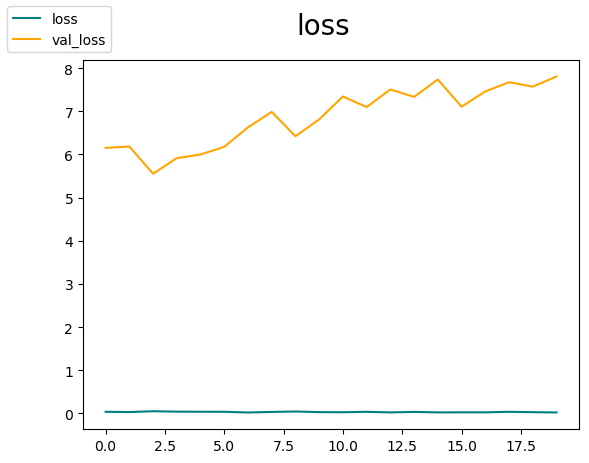

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
fig.legend(loc='upper left')
plt.show()

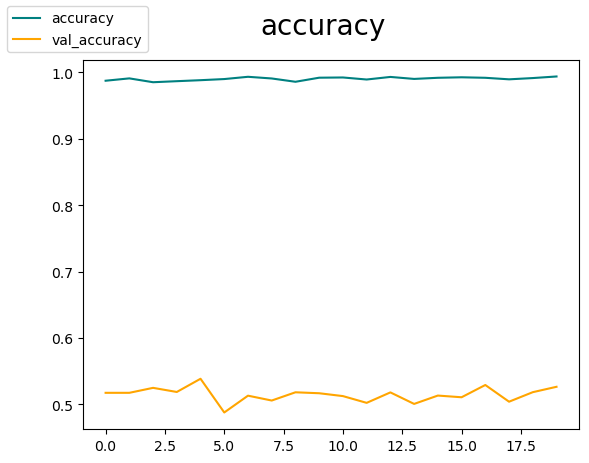

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
fig.legend(loc='upper left')
plt.show()

In [46]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

acc = Accuracy()
pre = Precision()
re = Recall()


for i, (x,y) in enumerate(test):
    y_predict = tf.argmax(model.predict(x))
    acc.update_state(tf.argmax(y), y_predict)
    pre.update_state(tf.argmax(y), y_predict)
    re.update_state(tf.argmax(y), y_predict)
    if i >= len(train): break

print(f'Precision : {pre.result()} \nRecall : {re.result()} \nAccuracy : {acc.result()}')

1/1 [==============================] - 0s 135ms/step


2025-01-11 15:08:12.782874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


2025-01-11 15:08:33.080383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step
Precision : 0.8498077392578125 
Recall : 0.9858304858207703 
Accuracy : 0.24543477594852448


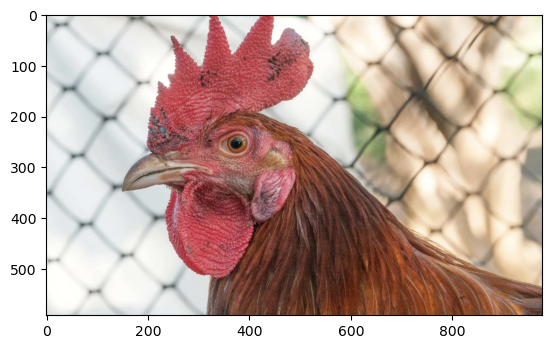

In [47]:
sample_image_path = os.path.join('/Users/abbazs/Projects/ML-Data-Science/enviroment_1/animals', 'sample_image_test.png')
image_bgr = cv2.imread(sample_image_path)
image_rgb = plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))

In [48]:
scaled_image = tf.image.resize(image_bgr, (256,256)) / 255
y_predict = model.predict(np.expand_dims(scaled_image, axis=0))
for key,val in train.class_indices.items():
    if val == np.argmax(y_predict): 
        print(key)

1/1 [==============================] - 0s 139ms/step
cane


In [49]:
model.save(os.path.join('models', 'animals_10.h5'))

/Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
